<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/AV_JOB_A_THON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement : Health Insurance Lead Prediction

Build a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

* Demographics (city, age, region etc.)
* Information regarding holding policies of the customer
* Recommended Policy Information


## Data Dictionary

**Train Data**
**=============================================**

**Variable	Definition**
* ID	Unique Identifier for a row
* City_Code	Code for the City of the customers
* Region_Code	Code for the Region of the customers
* Accomodation_Type	Customer Owns or Rents the house
* Reco_Insurance_Type	Joint or Individual type for the recommended insurance  
* Upper_Age	Maximum age of the customer 
* Lower _Age	Minimum age of the customer
* Is_Spouse	If the customers are married to each other
(in case of joint insurance) 
* Health_Indicator
Encoded values for health of the customer
* Holding_Policy_Duration	Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)
* Holding_Policy_Type
Type of holding policy
* Reco_Policy_Cat	Encoded value for recommended health insurance
* Reco_Policy_Premium	Annual Premium (INR) for the recommended health insurance
* Response **(Target)**	
    * 0 : Customer did not show interest in the recommended policy,
    * 1 : Customer showed interest in the recommended policy

**Test Data**
**=============================================**

**Variable	Definition**

* ID	Unique Identifier for a row
* City_Code	Code for the City of the customers
* Region_Code	Code for the Region of the customers
* Accomodation_Type	Customer Owns or Rents the house
* Reco_Insurance_Type	Joint or Individual type for the recommended insurance  
* Upper_Age	Maximum age of the customer 
* Lower _Age	Minimum age of the customer
* Is_Spouse	If the customers are married to each other
(in case of joint insurance) 
* Health_Indicator
Encoded values for health of the customer
* Holding_Policy_Duration	Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)
* Holding_Policy_Type
Type of holding policy
* Reco_Policy_Cat	Encoded value for recommended health insurance
* Reco_Policy_Premium	Annual Premium (INR) for the recommended health insurance

**Sample Submission**

**=============================================**
This file contains the exact submission format for the predictions. Please submit CSV file only.

Variable	Definition
* ID	Unique Identifier for a row
* Response	(Target) Probability of Customer showing interest (class 1)

In [1]:
!python --version

Python 3.7.10


## Load Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Upgrade pandas profiling to version 2.7.1 to be compatible with python version 3.7 in colab

In [4]:
!pip install pandas_profiling==2.7.1

     |████████████████████████████████| 256kB 5.5MB/s 
     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 604kB 5.6MB/s 
     |████████████████████████████████| 3.1MB 12.6MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 296kB 35.8MB/s 
  Created wheel for phik: filename=phik-0.11.1-cp37-none-any.whl size=599822 sha256=479c9ab2c0eff8f8438194c6c4e4adaadc46908f9e1d2681ef876d0103e1eed4
  Stored in directory: /root/.cache/pip/wheels/0e/c8/42/68bc8b9d86a040d84c1c76fa0104f6e0c89754595843093525
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=113c961099d5c90a31b590bf351e951b02751017d3df2d9cf32ff8593b94b11f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.1 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing inst

## Install TPOT package

In [145]:
!pip install tpot

     |████████████████████████████████| 92kB 4.0MB/s 
     |████████████████████████████████| 163kB 7.1MB/s 
     |████████████████████████████████| 157.5MB 79kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=0f8bf0c12eb8623b53182486519f56e3ccf1372390316eff9f8ed671722b0afd
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


## Load Data

In [36]:
train = pd.read_csv("/content/train_Df64byy.csv")
test = pd.read_csv("/content/test_YCcRUnU.csv")
sub = pd.read_csv("/content/sample_submission_QrCyCoT.csv")

## Display first five data sample from the dataframe

In [37]:
train.head()

ID City_Code  Region_Code  ... Reco_Policy_Cat Reco_Policy_Premium  Response
0   1        C3         3213  ...              22             11628.0         0
1   2        C5         1117  ...              22             30510.0         0
2   3        C5         3732  ...              19              7450.0         1
3   4       C24         4378  ...              19             17780.0         0
4   5        C8         2190  ...              16             10404.0         0

[5 rows x 14 columns]

## Schema Structure

In [7]:
train.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

## Summary Statistics

In [6]:
train.shape,test.shape

((50882, 14), (21805, 13))

In [8]:
train.describe(include='all')

ID City_Code  ...  Reco_Policy_Premium      Response
count   50882.000000     50882  ...         50882.000000  50882.000000
unique           NaN        36  ...                  NaN           NaN
top              NaN        C1  ...                  NaN           NaN
freq             NaN      8973  ...                  NaN           NaN
mean    25441.500000       NaN  ...         14183.950069      0.239947
std     14688.512535       NaN  ...          6590.074873      0.427055
min         1.000000       NaN  ...          2280.000000      0.000000
25%     12721.250000       NaN  ...          9248.000000      0.000000
50%     25441.500000       NaN  ...         13178.000000      0.000000
75%     38161.750000       NaN  ...         18096.000000      0.000000
max     50882.000000       NaN  ...         43350.400000      1.000000

[11 rows x 14 columns]

## Check for missing values

In [9]:
train.isnull().sum()[train.isnull().sum() > 0] / len(train)

Health Indicator           0.229767
Holding_Policy_Duration    0.397999
Holding_Policy_Type        0.397999
dtype: float64

In [10]:
test.isnull().sum()[test.isnull().sum() > 0] / len(test)

Health Indicator           0.230543
Holding_Policy_Duration    0.394543
Holding_Policy_Type        0.394543
dtype: float64

**Columns Health Indicator,Holding_Policy_Duration and Holding_Policy_Type have missing values as evident from above data analysis.**

## Analyzing the training data.

In [ ]:
train[train['Holding_Policy_Type'].isnull()]['Reco_Policy_Cat'].unique()

array([22, 17, 21, 18,  2, 19,  4, 16, 12,  6, 14, 11, 20,  3,  1, 15, 13,
        5,  9,  7,  8, 10])

In [49]:
reg_df = train.groupby(['Region_Code','City_Code','Response'])['ID'].count().reset_index().rename(columns={'ID':'Count'})
reg_df

Region_Code City_Code  Response  Count
0               1       C23         0     71
1               1       C23         1     25
2               2       C22         0     60
3               2       C22         1     13
4               4        C1         0     59
...           ...       ...       ...    ...
9162         6188        C2         0      1
9163         6189       C10         0      1
9164         6191       C32         1      1
9165         6193       C23         1      1
9166         6194       C34         1      1

[9167 rows x 4 columns]

In [50]:
reg_df1= reg_df[reg_df['Count'] ==1]
reg_df1

Region_Code City_Code  Response  Count
271           168        C2         1      1
413           253        C6         1      1
495           307        C2         1      1
597           367        C8         1      1
661           407       C11         1      1
...           ...       ...       ...    ...
9162         6188        C2         0      1
9163         6189       C10         0      1
9164         6191       C32         1      1
9165         6193       C23         1      1
9166         6194       C34         1      1

[1994 rows x 4 columns]

## Function to generate a new feature

In [51]:
def res_pos(x):
  if x == 0:
    return 0
  else:
    return 1

In [52]:
reg_df1['Rec_Likelihood'] = reg_df1['Response'].apply(lambda x : res_pos(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
reg_df1

Region_Code City_Code  Response  Count  Rec_Likelihood
271           168        C2         1      1               1
413           253        C6         1      1               1
495           307        C2         1      1               1
597           367        C8         1      1               1
661           407       C11         1      1               1
...           ...       ...       ...    ...             ...
9162         6188        C2         0      1               0
9163         6189       C10         0      1               0
9164         6191       C32         1      1               1
9165         6193       C23         1      1               1
9166         6194       C34         1      1               1

[1994 rows x 5 columns]

In [54]:
reg = pd.merge(reg_df,reg_df1,on=['Region_Code','City_Code','Response','Count'],how='left')

In [55]:
reg

Region_Code City_Code  Response  Count  Rec_Likelihood
0               1       C23         0     71             NaN
1               1       C23         1     25             NaN
2               2       C22         0     60             NaN
3               2       C22         1     13             NaN
4               4        C1         0     59             NaN
...           ...       ...       ...    ...             ...
9162         6188        C2         0      1             0.0
9163         6189       C10         0      1             0.0
9164         6191       C32         1      1             1.0
9165         6193       C23         1      1             1.0
9166         6194       C34         1      1             1.0

[9167 rows x 5 columns]

In [56]:
reg['Rec_Likelihood'] = reg['Rec_Likelihood'].fillna(99)

In [57]:
reg['Rec_Likelihood'].value_counts(normalize=True)

99.0    0.782481
1.0     0.141813
0.0     0.075706
Name: Rec_Likelihood, dtype: float64

In [58]:
reg.drop(['Count','Response'],axis=1,inplace=True)

In [59]:
reg

Region_Code City_Code  Rec_Likelihood
0               1       C23            99.0
1               1       C23            99.0
2               2       C22            99.0
3               2       C22            99.0
4               4        C1            99.0
...           ...       ...             ...
9162         6188        C2             0.0
9163         6189       C10             0.0
9164         6191       C32             1.0
9165         6193       C23             1.0
9166         6194       C34             1.0

[9167 rows x 3 columns]

In [60]:
train_merge = pd.merge(train,reg,on=['Region_Code','City_Code'],how='left')

In [65]:
train[train['City_Code'] =='C2']

ID City_Code  ...  Reco_Policy_Premium Response
30        31        C2  ...              22176.0        0
36        37        C2  ...              21582.0        0
40        41        C2  ...              19830.0        0
45        46        C2  ...              16248.0        0
48        49        C2  ...              28260.0        1
...      ...       ...  ...                  ...      ...
50834  50835        C2  ...              33796.0        0
50835  50836        C2  ...              25726.0        0
50840  50841        C2  ...               7296.0        0
50848  50849        C2  ...              14976.0        0
50850  50851        C2  ...              30273.6        0

[7747 rows x 14 columns]

In [67]:
test[test['Region_Code'] == 6188]

Empty DataFrame
Columns: [ID, City_Code, Region_Code, Accomodation_Type, Reco_Insurance_Type, Upper_Age, Lower_Age, Is_Spouse, Health Indicator, Holding_Policy_Duration, Holding_Policy_Type, Reco_Policy_Cat, Reco_Policy_Premium]
Index: []

In [66]:
train[train['Region_Code'] == 6188]

ID City_Code  ...  Reco_Policy_Premium Response
11877  11878        C2  ...              21672.0        0

[1 rows x 14 columns]

In [69]:
train[train['Region_Code'] == 6194]

ID City_Code  ...  Reco_Policy_Premium Response
15588  15589       C34  ...               6110.0        1

[1 rows x 14 columns]

In [68]:
test[test['Region_Code'] == 6194]

Empty DataFrame
Columns: [ID, City_Code, Region_Code, Accomodation_Type, Reco_Insurance_Type, Upper_Age, Lower_Age, Is_Spouse, Health Indicator, Holding_Policy_Duration, Holding_Policy_Type, Reco_Policy_Cat, Reco_Policy_Premium]
Index: []

hence decided no to go forward with this region code feature

In [61]:
test_merge = pd.merge(test,reg,on=['Region_Code','City_Code'],how='left')

In [63]:
train.shape,test.shape,train_merge.shape,test_merge.shape

((50882, 14), (21805, 13), (97670, 15), (41252, 14))

In [44]:
train.isnull().sum()[train.isnull().sum() > 0]

Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
dtype: int64

In [47]:
test.isnull().sum()[test.isnull().sum() > 0]

Health Indicator            9489
Holding_Policy_Duration    16295
Holding_Policy_Type        16295
Response                     279
Rec_Likelihood               279
dtype: int64

In [ ]:
train['Upper_Age'].max(),train['Upper_Age'].min()

(75, 18)

In [ ]:
test['Upper_Age'].max(),test['Upper_Age'].min()

(75, 18)

In [ ]:
train['Lower_Age'].max(),train['Lower_Age'].min()

(75, 16)

In [ ]:
test['Lower_Age'].max(),test['Lower_Age'].min()

(75, 16)

In [ ]:
res_1 = train[train['Response'] == 1 ]['Region_Code'].unique().tolist()

In [ ]:
res_0 = train[train['Response'] == 0 ]['Region_Code'].unique().tolist()

In [ ]:
# Uncommon elements in Lists of List 
one_not_0 = set(res_1) - set(res_0)

In [ ]:
one_not_0 = list(one_not_0 )

#### The region codes which always have a response code as 1

In [ ]:
train[train['Region_Code'].isin(one_not_0)]['Response'].unique()

array([1])

In [ ]:
train[train['Region_Code'].isin(one_not_0)].head()

ID City_Code  ...  Reco_Policy_Premium Response
221    222       C13  ...              19552.0        1
577    578       C21  ...               9296.0        1
799    800        C2  ...              18844.0        1
931    932        C1  ...              22022.0        1
1065  1066       C21  ...              16848.0        1

[5 rows x 14 columns]

#### The region codes which always have a response code as 0

In [ ]:
zero_not_1 = set(res_0) - set(res_1)
zero_not_1 = list(zero_not_1 )

In [ ]:
train[train['Region_Code'].isin(zero_not_1)]['Response'].unique()

array([0])

In [ ]:
train[train['Region_Code'].isin(zero_not_1)].head()

ID City_Code  Region_Code  ... Reco_Policy_Cat Reco_Policy_Premium  Response
8    9       C15         3497  ...               1             27283.2         0
41  42       C18         3256  ...              19              5424.0         0
53  54        C2         3683  ...              17             22746.0         0
63  64        C1         2980  ...               8             32832.0         0
76  77        C8         1883  ...               1              9792.0         0

[5 rows x 14 columns]

In [ ]:
len(list(zero_not_1 )) + len(list(one_not_0))

1465

In [ ]:
train['Response_Possibility'] = train['Region_Code'].apply(lambda x : res_pos(x))

In [ ]:
test['Response_Possibility'] = test['Region_Code'].apply(lambda x : res_pos(x))

In [ ]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response',
       'Response_Possibility'],
      dtype='object')

In [ ]:
train = train[['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium','Response_Possibility' ,'Response']]

In [ ]:
train.head()

ID City_Code  ...  Response_Possibility Response
0   1        C3  ...                 Mixed        0
1   2        C5  ...                 Mixed        0
2   3        C5  ...                 Mixed        1
3   4       C24  ...                 Mixed        0
4   5        C8  ...                 Mixed        0

[5 rows x 15 columns]

## EDA

In [ ]:
train['Response'].value_counts(normalize=True)

0    0.760053
1    0.239947
Name: Response, dtype: float64

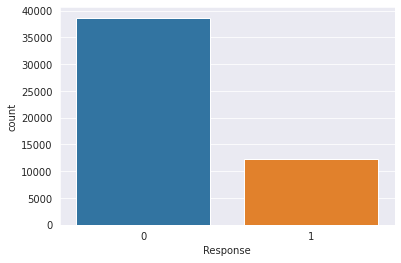

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x= 'Response',data=train)
plt.show()

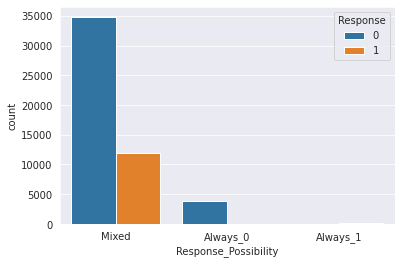

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Response_Possibility',data=train,hue='Response')
plt.show()

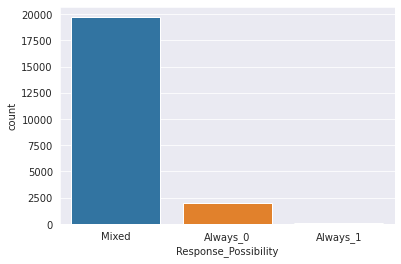

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Response_Possibility',data=test)
plt.show()

#### data is imbalanced with 76% of the data for class 0 and only 24% for class 1

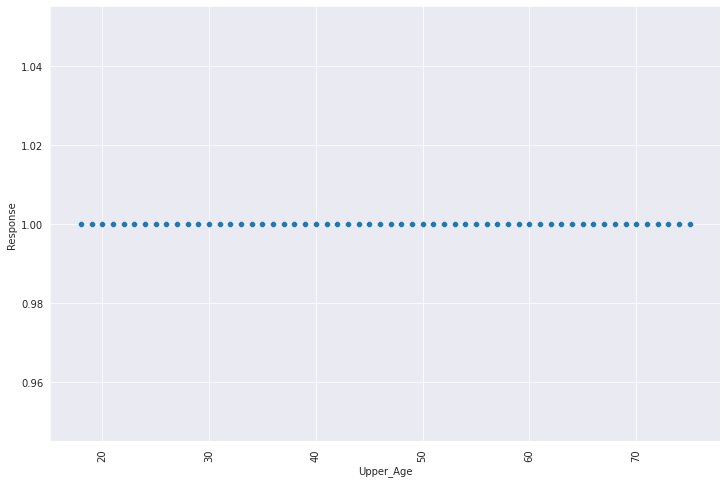

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.scatterplot(x= 'Upper_Age',y='Response',data=train[train['Response'] == 1])
plt.show()

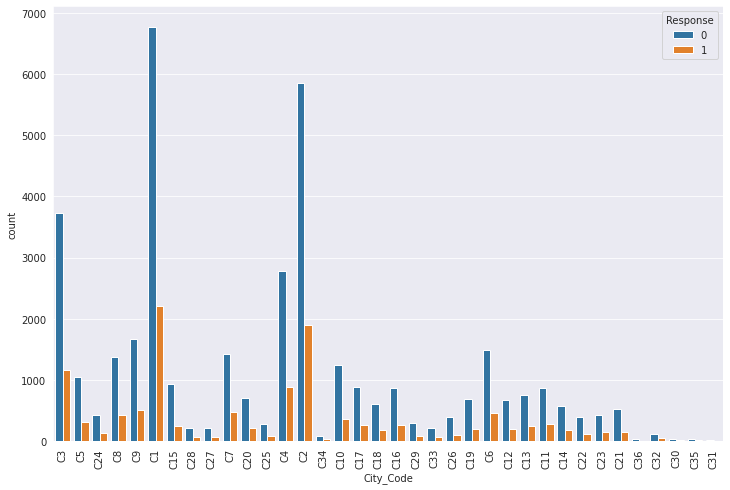

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'City_Code',data=train,hue='Response')
plt.show()

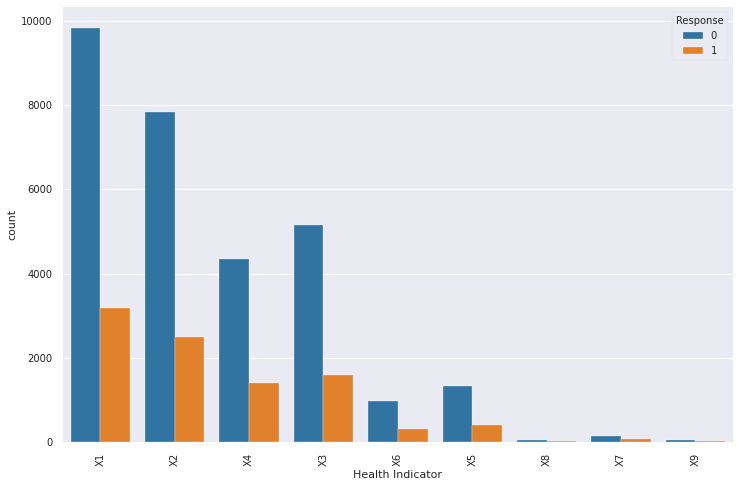

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'Health Indicator',data=train,hue='Response')
plt.show()

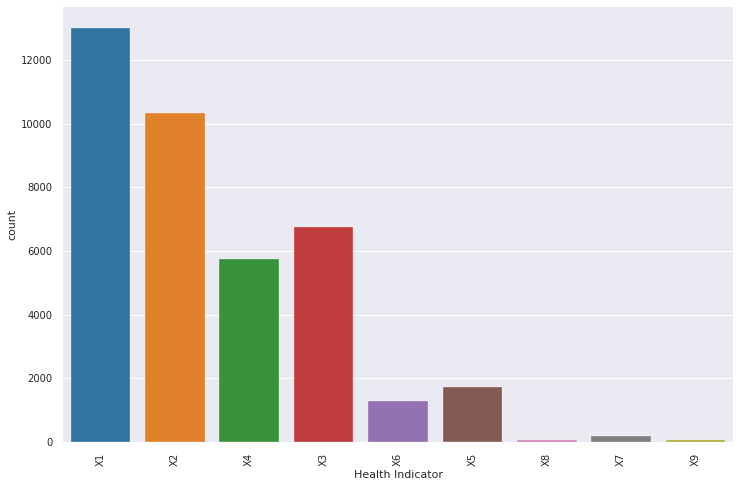

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'Health Indicator',data=train)
plt.show()

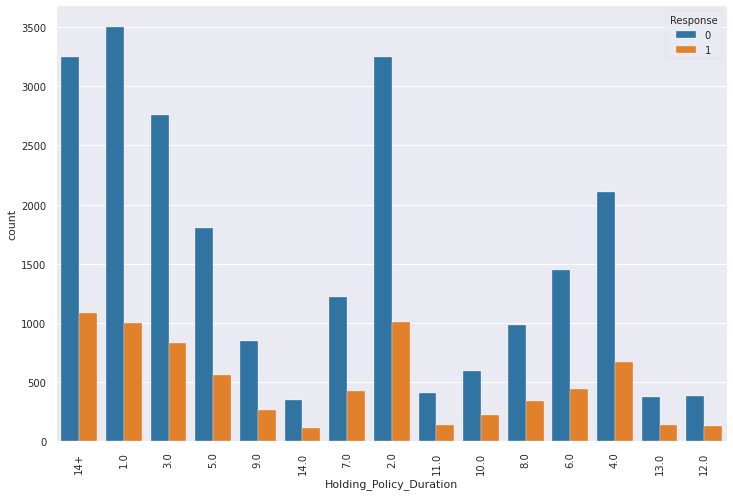

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'Holding_Policy_Duration',data=train,hue='Response')
plt.show()

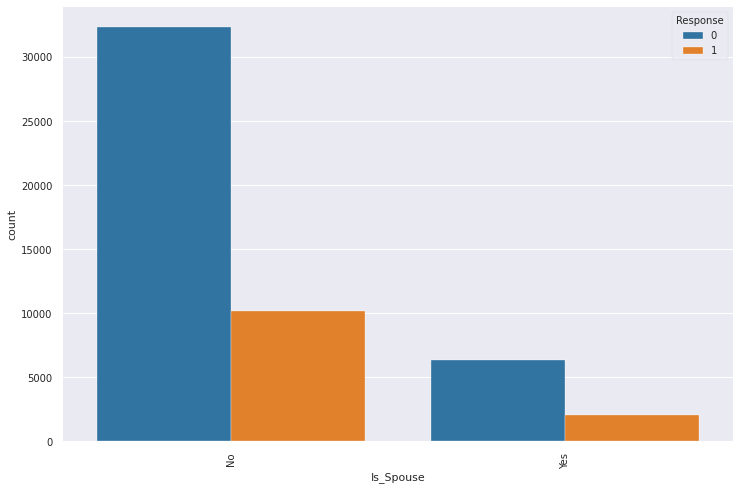

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'Is_Spouse',data=train,hue='Response')
plt.show()

In [ ]:
train['Health Indicator'].value_counts(normalize=True,dropna=False)

X1     0.255690
NaN    0.229767
X2     0.203058
X3     0.132896
X4     0.112869
X5     0.033941
X6     0.025156
X7     0.003852
X8     0.001533
X9     0.001238
Name: Health Indicator, dtype: float64

In [38]:
train_new = train.copy()
test_new = test.copy()

In [ ]:
train['Holding_Policy_Duration'].value_counts(normalize=True,dropna=False)

NaN     0.397999
1.0     0.088420
14+     0.085197
2.0     0.083723
3.0     0.070477
4.0     0.054459
5.0     0.046421
6.0     0.037223
7.0     0.032330
8.0     0.025864
9.0     0.021894
10.0    0.015978
11.0    0.010731
12.0    0.010082
13.0    0.010043
14.0    0.009158
Name: Holding_Policy_Duration, dtype: float64

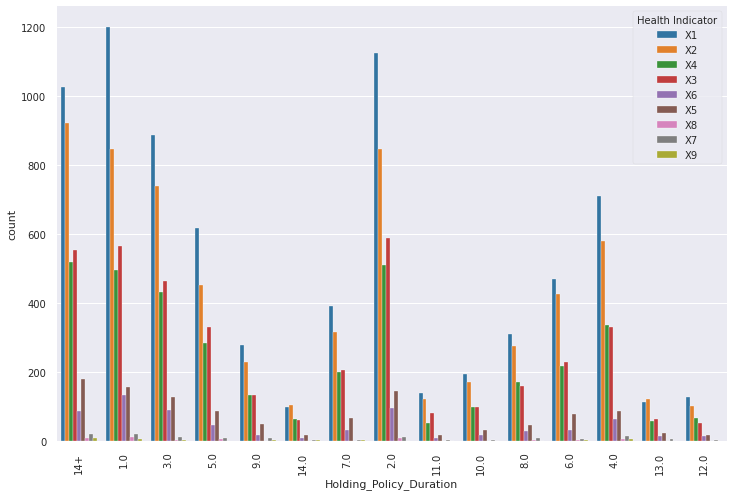

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'Holding_Policy_Duration',data=train,hue='Health Indicator')
plt.show()

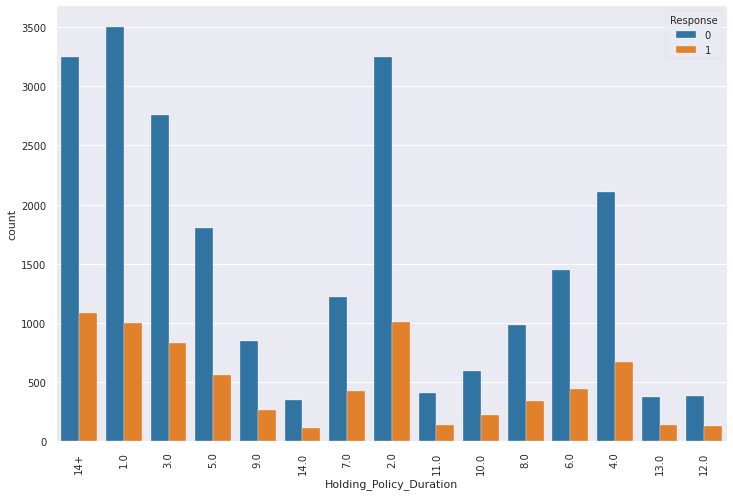

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'Holding_Policy_Duration',data=train,hue='Response')
plt.show()

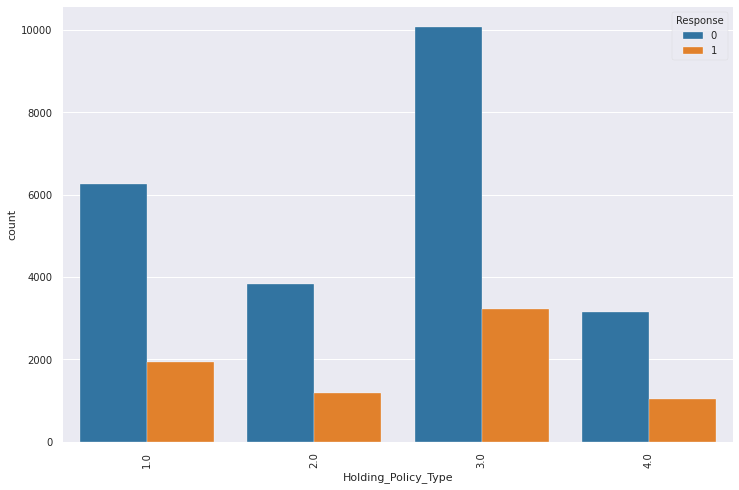

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'Holding_Policy_Type',data=train,hue='Response')
plt.show()

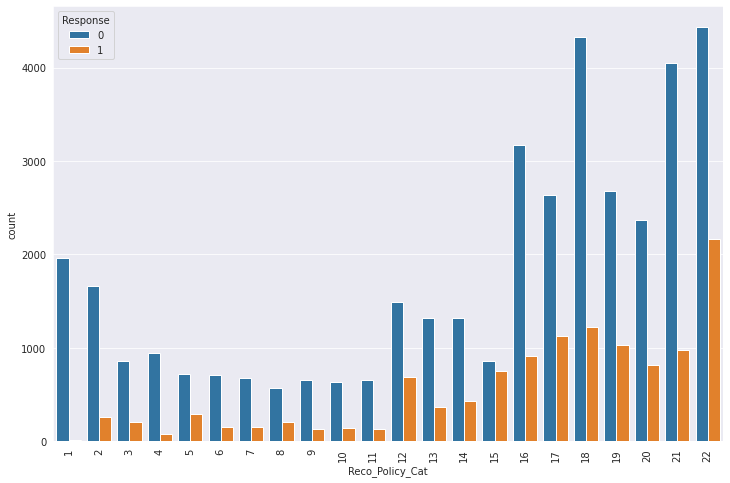

In [71]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'Reco_Policy_Cat',data=train,hue='Response')
plt.show()

In [73]:
train['Reco_Policy_Cat'].value_counts(normalize=True)

22    0.129751
18    0.109135
21    0.098797
16    0.080264
17    0.073818
19    0.072874
20    0.062439
12    0.042608
1     0.038658
2     0.037675
14    0.034236
13    0.033096
15    0.031740
3     0.020813
4     0.019948
5     0.019791
6     0.016725
7     0.016391
9     0.015506
11    0.015349
8     0.015251
10    0.015133
Name: Reco_Policy_Cat, dtype: float64

In [39]:
reco_policy_0_wt = train[train['Response']==0]['Reco_Policy_Cat'].value_counts(normalize=True).to_dict()

In [40]:
reco_policy_1_wt = train[train['Response']==1]['Reco_Policy_Cat'].value_counts(normalize=True).to_dict()

In [79]:
reco_policy_0_wt 

{1: 0.05065549608253821,
 2: 0.043001577327851474,
 3: 0.02208258992061645,
 4: 0.024306363612856517,
 5: 0.018462493212318673,
 6: 0.01820391487601169,
 7: 0.017557469035244227,
 8: 0.014661391668606005,
 9: 0.01701445452899956,
 10: 0.0163938665218628,
 11: 0.016833449693584673,
 12: 0.03839888294158715,
 13: 0.03402890905799912,
 14: 0.03405476689162982,
 15: 0.022315310423292736,
 16: 0.08199519044294469,
 17: 0.06813539161689033,
 18: 0.11191270395366276,
 19: 0.06932485196390246,
 20: 0.06120549220386316,
 21: 0.1048017997052207,
 22: 0.1146536343185168}

In [80]:
reco_policy_1_wt 

{1: 0.0006552543205831763,
 2: 0.02080432467851585,
 3: 0.016790891964943894,
 4: 0.006143009255467278,
 5: 0.023998689491358832,
 6: 0.012040298140715866,
 7: 0.012695552461299041,
 8: 0.01711851912523548,
 9: 0.010729789499549513,
 10: 0.011139323449913998,
 11: 0.010647882709476615,
 12: 0.05594233761978868,
 13: 0.030141698746826113,
 14: 0.034810385780981244,
 15: 0.06159390613481858,
 16: 0.074780899336555,
 17: 0.09181751167171759,
 18: 0.10033581783929887,
 19: 0.08411827340486526,
 20: 0.06634449995904661,
 21: 0.07977721353100171,
 22: 0.1775739208780408}

## Generate new feature Recommended policy category weightage

In [41]:
train['Not_Reco_Wt'] = train['Reco_Policy_Cat'].map(reco_policy_0_wt)
train['Reco_Wt'] = train['Reco_Policy_Cat'].map(reco_policy_1_wt)

In [42]:
test['Not_Reco_Wt'] = test['Reco_Policy_Cat'].map(reco_policy_0_wt)
test['Reco_Wt'] = test['Reco_Policy_Cat'].map(reco_policy_1_wt)

In [43]:
train.isnull().sum()[train.isnull().sum() > 0]

Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
dtype: int64

In [44]:
test.isnull().sum()[test.isnull().sum() > 0]

Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
dtype: int64

In [10]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Not_Reco_Wt',
       'Reco_Wt'],
      dtype='object')

In [45]:
train = train[['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Not_Reco_Wt',
       'Reco_Wt', 'Response']]

In [ ]:
!pip install pandas_profiling==2.7.1

     |████████████████████████████████| 256kB 14.4MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 604kB 18.8MB/s 
     |████████████████████████████████| 3.1MB 54.7MB/s 
     |████████████████████████████████| 296kB 61.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=5fbffd2acf070af735909bf033ee476b8bbe9e7e59c1f8158cdcca49b3a92d36
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.1-cp37-none-any.whl size=599822 sha256=7a5789f85a36f44269cda6e7d373727c9eacfd1b293d75f18be60cf6680dbe5b
  Stored in directory: /root/.cache/pip/wheels/0e/c8/42/68bc8b9d86a040d84c1c76fa0104f6e0c89754595843093525
Successfully built htmlmin phik
ERROR: phik 0.11.1 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

In [87]:
import pandas_profiling 
from pandas_profiling import ProfileReport
prof = ProfileReport(train)


In [88]:
prof

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

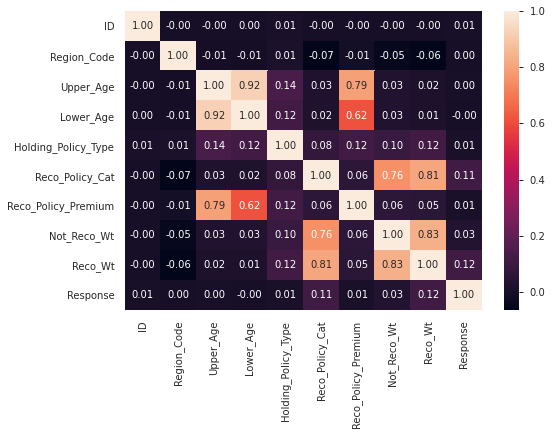

In [89]:
corr = train.corr()
sns.heatmap(corr,annot=True,fmt=".2f")

In [46]:
cat_cols = [col for col in train.columns if train[col].dtypes =='O']
cat_cols

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration']

## Attributes having missing Values

In [91]:
train.isnull().sum()[train.isnull().sum() > 0] / len(train)

Health Indicator           0.229767
Holding_Policy_Duration    0.397999
Holding_Policy_Type        0.397999
dtype: float64

The above missing data % is in sync with the report in pandas profiling 

In [92]:
missing_cols = train.isnull().sum()[train.isnull().sum() > 0].index.tolist()

In [93]:
train[missing_cols].dtypes

Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
dtype: object

## Impute missing values

In [47]:
train_new = train.copy()
test_new = test.copy()

In [48]:
train_new['Health Indicator'] = train_new['Health Indicator'].fillna('MS')
test_new['Health Indicator'] = test_new['Health Indicator'].fillna('MS')
train_new['Holding_Policy_Duration'] = train_new['Holding_Policy_Duration'].fillna('MS')
test_new['Holding_Policy_Duration'] = test_new['Holding_Policy_Duration'].fillna('MS')

In [49]:
train_new['Holding_Policy_Type'] = train_new['Holding_Policy_Type'].fillna(train_new['Holding_Policy_Type'].mode()[0])
##train_new['Holding_Policy_Type'] = train_new['Holding_Policy_Type'].fillna(99)

In [50]:
test_new['Holding_Policy_Type'] = test_new['Holding_Policy_Type'].fillna(test_new['Holding_Policy_Type'].mode()[0])
##test_new['Holding_Policy_Type'] = test_new['Holding_Policy_Type'].fillna(99)

In [51]:
train_new.isnull().sum()[train_new.isnull().sum() > 0].index.tolist()

[]

In [52]:
test_new.isnull().sum()[test_new.isnull().sum() > 0].index.tolist()

[]

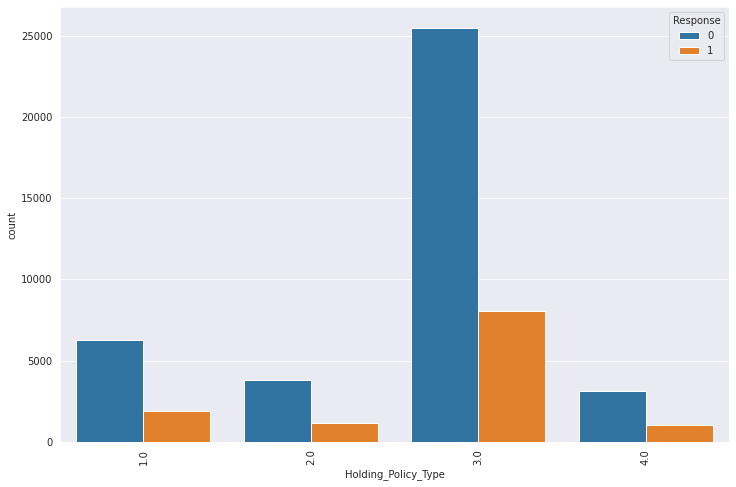

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(x= 'Holding_Policy_Type',data=train_new,hue='Response')
plt.show()

In [54]:
train_new.head()

ID City_Code  Region_Code  ... Not_Reco_Wt   Reco_Wt  Response
0   1        C3         3213  ...    0.114654  0.177574         0
1   2        C5         1117  ...    0.114654  0.177574         0
2   3        C5         3732  ...    0.069325  0.084118         1
3   4       C24         4378  ...    0.069325  0.084118         0
4   5        C8         2190  ...    0.081995  0.074781         0

[5 rows x 16 columns]

In [55]:
train_new['Holding_Policy_Type'] = train_new['Holding_Policy_Type'].astype(int)

In [56]:
test_new['Holding_Policy_Type'] = test_new['Holding_Policy_Type'].astype(int)

## Corelation after missing value imputation

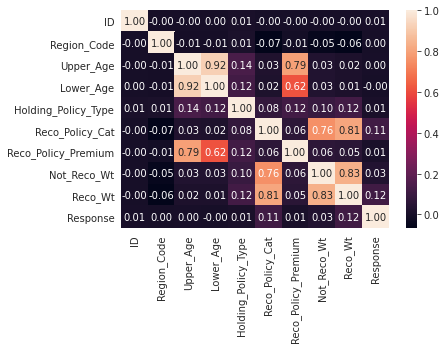

In [57]:
corr = train.corr()
sns.heatmap(corr,annot=True,fmt=".2f")

In [58]:
train_new['Holding_Policy_Type'] = train_new['Holding_Policy_Type'].astype(str)
test_new['Holding_Policy_Type'] = test_new['Holding_Policy_Type'].astype(str)

In [59]:
train_new.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type         object
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Not_Reco_Wt                float64
Reco_Wt                    float64
Response                     int64
dtype: object

In [60]:
train_new['Reco_Policy_Cat'] = train_new['Reco_Policy_Cat'].astype('str')

train_new['Region_Code'] = train_new['Region_Code'].astype('str')

## Separate features and labels

## Label Encoding for other classifiers
* train_new
* test_new

In [ ]:
train_enc = train_new.copy()
test_enc = test_new.copy()

In [ ]:
city_cd = {v:k for k,v in enumerate(train_new['City_Code'].value_counts(ascending=True).index.tolist())}
train_enc['City_Code'] = train_enc['City_Code'].map(city_cd)
city_cd 


{'C1': 35,
 'C10': 27,
 'C11': 23,
 'C12': 18,
 'C13': 21,
 'C14': 16,
 'C15': 25,
 'C16': 22,
 'C17': 24,
 'C18': 17,
 'C19': 19,
 'C2': 34,
 'C20': 20,
 'C21': 15,
 'C22': 12,
 'C23': 14,
 'C24': 13,
 'C25': 9,
 'C26': 11,
 'C27': 8,
 'C28': 6,
 'C29': 10,
 'C3': 33,
 'C30': 3,
 'C31': 0,
 'C32': 5,
 'C33': 7,
 'C34': 4,
 'C35': 2,
 'C36': 1,
 'C4': 32,
 'C5': 26,
 'C6': 30,
 'C7': 29,
 'C8': 28,
 'C9': 31}

In [ ]:
test_enc['City_Code'] = test_enc['City_Code'].map(city_cd)

In [ ]:
acc_cd = {v:k for k,v in enumerate(train_new['Accomodation_Type'].value_counts(ascending=True).index.tolist())}
train_enc['Accomodation_Type'] = train_enc['Accomodation_Type'].map(acc_cd)
acc_cd 

{'Owned': 1, 'Rented': 0}

In [ ]:
test_enc['Accomodation_Type'] = test_enc['Accomodation_Type'].map(acc_cd)
 

In [ ]:
reco_cd = {v:k for k,v in enumerate(train_new['Reco_Insurance_Type'].value_counts(ascending=True).index.tolist())}
train_enc['Reco_Insurance_Type'] = train_enc['Reco_Insurance_Type'].map(reco_cd)
reco_cd 

{'Individual': 1, 'Joint': 0}

In [ ]:
test_enc['Reco_Insurance_Type'] = test_enc['Reco_Insurance_Type'].map(reco_cd)

In [ ]:
spouse_cd = {v:k for k,v in enumerate(train_new['Is_Spouse'].value_counts(ascending=True).index.tolist())}
train_enc['Is_Spouse'] = train_enc['Is_Spouse'].map(spouse_cd)
spouse_cd 

{'No': 1, 'Yes': 0}

In [ ]:
test_enc['Is_Spouse'] = test_enc['Is_Spouse'].map(spouse_cd)

In [ ]:
health_cd = {v:k for k,v in enumerate(train_new['Health Indicator'].value_counts(ascending=True).index.tolist())}
train_enc['Health Indicator'] = train_enc['Health Indicator'].map(health_cd)
health_cd 

{'MS': 8,
 'X1': 9,
 'X2': 7,
 'X3': 6,
 'X4': 5,
 'X5': 4,
 'X6': 3,
 'X7': 2,
 'X8': 1,
 'X9': 0}

In [ ]:
test_enc['Health Indicator'] = test_enc['Health Indicator'].map(health_cd)

In [ ]:
policy_du_cd = {v:k for k,v in enumerate(train_new['Holding_Policy_Duration'].value_counts(ascending=True).index.tolist())}
train_enc['Holding_Policy_Duration'] = train_enc['Holding_Policy_Duration'].map(policy_du_cd)
policy_du_cd

{'1.0': 14,
 '10.0': 4,
 '11.0': 3,
 '12.0': 2,
 '13.0': 1,
 '14+': 13,
 '14.0': 0,
 '2.0': 12,
 '3.0': 11,
 '4.0': 10,
 '5.0': 9,
 '6.0': 8,
 '7.0': 7,
 '8.0': 6,
 '9.0': 5,
 'MS': 15}

In [ ]:
test_enc['Holding_Policy_Duration'] = test_enc['Holding_Policy_Duration'].map(policy_du_cd)

In [ ]:
policy_ty_cd = {v:k for k,v in enumerate(train_new['Holding_Policy_Type'].value_counts(ascending=True).index.tolist())}
train_enc['Holding_Policy_Type'] = train_enc['Holding_Policy_Type'].map(policy_ty_cd)
policy_ty_cd

{'1.0': 2, '2.0': 1, '3.0': 3, '4.0': 0, '99.0': 4}

In [ ]:
test_enc['Holding_Policy_Type'] = test_enc['Holding_Policy_Type'].map(policy_ty_cd)

In [ ]:
train_enc.head()

ID  City_Code  Region_Code  ...  Reco_Policy_Cat  Reco_Policy_Premium  Response
0   1         33         3213  ...               22              11628.0         0
1   2         26         1117  ...               22              30510.0         0
2   3         26         3732  ...               19               7450.0         1
3   4         13         4378  ...               19              17780.0         0
4   5         28         2190  ...               16              10404.0         0

[5 rows x 14 columns]

In [ ]:
test_enc.head()

ID  City_Code  ...  Reco_Policy_Cat  Reco_Policy_Premium
0  50883         35  ...                5              11934.0
1  50884         32  ...               18              32204.8
2  50885         35  ...               17               9240.0
3  50886         33  ...               18               9086.0
4  50887         35  ...                5              22534.0

[5 rows x 13 columns]

## Label Encoding for other classifiers End
* train_new
* test_new


In [61]:
X = train_new.drop('Response',axis=1)
Y = train_new['Response']

In [62]:
X.head()

ID City_Code Region_Code  ... Reco_Policy_Premium Not_Reco_Wt   Reco_Wt
0   1        C3        3213  ...             11628.0    0.114654  0.177574
1   2        C5        1117  ...             30510.0    0.114654  0.177574
2   3        C5        3732  ...              7450.0    0.069325  0.084118
3   4       C24        4378  ...             17780.0    0.069325  0.084118
4   5        C8        2190  ...             10404.0    0.081995  0.074781

[5 rows x 15 columns]

In [63]:
X = X.drop('ID',axis=1)

In [23]:
!pip install catboost

     |████████████████████████████████| 65.7MB 84kB/s 


In [24]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *

In [105]:
train_new.to_csv("train_processed.csv",index=False)
test_new.to_csv("test_processed.csv",index=False)

## Hyperparameters selection using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'max_depth': [4,6,8,10],
    'num_boost_round': [1000,2000,2500,6000,10000],
    'random_state' : [42,50,60,70,90]
    }
catboost = CatBoostClassifier(eval_metric='AUC',auto_class_weights='Balanced',
                                   num_boost_round=6000,verbose=0)
grid = GridSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y,cat_features = cat_cols)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 17.8min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 241.0min


## Hyperparameter optimization using hperopt

In [134]:
!pip install hyperopt

In [31]:
cat_cols = [col for col in train_new.columns if train_new[col].dtypes =='O']
cat_cols

['City_Code',
 'Region_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat']

In [135]:
X.head()

City_Code Region_Code  ... Not_Reco_Wt   Reco_Wt
0        C3        3213  ...    0.114654  0.177574
1        C5        1117  ...    0.114654  0.177574
2        C5        3732  ...    0.069325  0.084118
3       C24        4378  ...    0.069325  0.084118
4        C8        2190  ...    0.081995  0.074781

[5 rows x 14 columns]

In [136]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope
from functools import partial
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [137]:
def optimize(params, x, y):
  
  # initialize model with current parameters
  model = CatBoostClassifier(**params,eval_metric='AUC',auto_class_weights='Balanced')
  #model = RandomForestClassifier(**params)
  # initialize stratified k-fold
  kf = StratifiedKFold(n_splits=5)
  # initialize accuracy list
  accuracies = []
  # loop over all folds
  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain,xtest = x.iloc[train_idx],x.iloc[test_idx]
    ytrain,ytest = y[train_idx],y[test_idx]
    # fit model for current fold
    model.fit(xtrain, ytrain,cat_features=cat_cols)
    #model.fit(xtrain, ytrain)
    #create predictions
    preds = model.predict(xtest)
    # calculate and append accuracy
    fold_accuracy = accuracy_score(ytest,preds)
    accuracies.append(fold_accuracy)
  # return negative accuracy
  return -1 * np.mean(accuracies)

## Parameter space for CatBoostClassifier

In [142]:
# define a parameter space
# now we use hyperopt
param_space = {
# quniform gives round(uniform(low, high) / q) * q
# we want int values for depth and estimators
"max_depth": scope.int(hp.quniform("max_depth", 1, 15, 1)),
#CatBoostError: only one of the parameters iterations, n_estimators, num_boost_round, num_trees should be initialized.
#"n_estimators": scope.int(hp.quniform("n_estimators", 100, 1500, 1)),
# choice chooses from a list of values
"learning_rate": hp.loguniform('learning_rate', -5.0, -2),
# uniform chooses a value between two values
"random_state": scope.int(hp.quniform("random_state", 40, 100,10)),
"num_boost_round": scope.int(hp.quniform("num_boost_round", 1000, 10000,10))
}

## Parameter space for random forest classifier

In [141]:
# define a parameter space
# now we use hyperopt
param_space = {
# quniform gives round(uniform(low, high) / q) * q
# we want int values for depth and estimators
"max_depth": scope.int(hp.quniform("max_depth", 1, 15, 1)),
"n_estimators": scope.int(hp.quniform("n_estimators", 100, 1500, 1)),
# choice chooses from a list of values
"criterion": hp.choice("criterion", ["gini", "entropy"]),
# uniform chooses a value between two values
"max_features": hp.uniform("max_features", 0, 1),
"class_weight":hp.choice("class_weight",[{0:1,1:2},{0:0.5,1:2},{0:1,1:4}])
}

In [143]:
param_space

{'learning_rate': <hyperopt.pyll.base.Apply at 0x7f912e0d4150>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7f912e0d41d0>,
 'num_boost_round': <hyperopt.pyll.base.Apply at 0x7f912e0d4dd0>,
 'random_state': <hyperopt.pyll.base.Apply at 0x7f912e0d4f90>}

## Reformulate X and Y for RandomForestClassifier as it does not handle categorical values

In [ ]:
X = train_enc.drop(['ID','Response'],axis=1)
Y = train_enc['Response']

NameError: ignored

## HyperParameter optimization using hyperopt

In [144]:
# partial function
optimization_function = partial(optimize,x=X,y=Y)
# initialize trials to keep logging information
trials = Trials()
# run hyperopt
hopt = fmin(fn=optimization_function,
             space=param_space,
            algo=tpe.suggest,
            max_evals=15,
            trials=trials
           )

Streaming output truncated to the last 5000 lines.

1251:	total: 7m 6s	remaining: 44m 17s

1252:	total: 7m 6s	remaining: 44m 16s

1253:	total: 7m 7s	remaining: 44m 16s

1254:	total: 7m 7s	remaining: 44m 16s

1255:	total: 7m 7s	remaining: 44m 15s

1256:	total: 7m 8s	remaining: 44m 15s

1257:	total: 7m 8s	remaining: 44m 15s

1258:	total: 7m 9s	remaining: 44m 14s

1259:	total: 7m 9s	remaining: 44m 14s

1260:	total: 7m 9s	remaining: 44m 14s

1261:	total: 7m 10s	remaining: 44m 13s

1262:	total: 7m 10s	remaining: 44m 13s

1263:	total: 7m 10s	remaining: 44m 12s

1264:	total: 7m 11s	remaining: 44m 12s

1265:	total: 7m 11s	remaining: 44m 12s

1266:	total: 7m 11s	remaining: 44m 11s

1267:	total: 7m 12s	remaining: 44m 11s

1268:	total: 7m 12s	remaining: 44m 11s

1269:	total: 7m 12s	remaining: 44m 10s

1270:	total: 7m 13s	remaining: 44m 10s

1271:	total: 7m 13s	remaining: 44m 10s

1272:	total: 7m 13s	remaining: 44m 9s

1273:	total: 7m 14s	remaining: 44m 9s

1274:	total: 7m 14s	remaining: 44m 9s

1

KeyboardInterrupt: ignored

In [118]:
print(f" parameters for RandomForestClassifier {hopt}")

 parameters for RandomForestClassifier {'learning_rate': 0.04627007502666947, 'n_estimators': 1483.0, 'random_state': 60.0}


## Hyperopt selected parameters for CatBoostClassifier

In [119]:
print(f" parameters for CatBoostClassifier {hopt}")

 parameters for CatBoostClassifier {'learning_rate': 0.04627007502666947, 'n_estimators': 1483.0, 'random_state': 60.0}


In [ ]:
hopt.values()

dict_values([0.029249515097994776, 1429.0, 90.0])

## Applying Startified KFold prediction based on the hyperparameters obtained by hyperopt

In [64]:
cat_cols = [col for col in X.columns if X[col].dtypes == 'O']

In [29]:
X.head()

City_Code  Region_Code  ... Not_Reco_Wt   Reco_Wt
0        C3         3213  ...    0.114654  0.177574
1        C5         1117  ...    0.114654  0.177574
2        C5         3732  ...    0.069325  0.084118
3       C24         4378  ...    0.069325  0.084118
4        C8         2190  ...    0.081995  0.074781

[5 rows x 14 columns]

In [ ]:
X_new = X.drop(['Not_'])

In [65]:
cat_cols

['City_Code',
 'Region_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat']

Running 1 iteration
0.7869455764626192
0.7838141532287166
Running 2 iteration
0.7860496875417469
0.7880149421057572
Running 3 iteration
0.7867166405801874
0.7887243376072504
Running 4 iteration
0.7810788636077584
0.7893831978440999
Running 5 iteration
0.7845474853788406
0.7899028880876212
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.7810788636077584 0.7899028880876212 0.7865177772444598


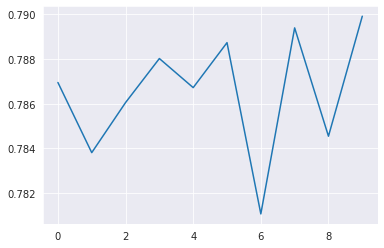

In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = CatBoostClassifier(max_depth=3,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1000,verbose=0)
        model.fit(xtrain,ytrain,cat_features = cat_cols)
            
        preds = model.predict_proba(xtest)[:,1]
        
        print(roc_auc_score(ytest,preds))
        scores.append(roc_auc_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

## Apply StratifiedKFold cross validation using the optimal hyperparameters selected by hyperopt for RandomForestClassifier

Running 1 iteration
0.6850735494920775
0.6776776020851711
Running 2 iteration
0.6868532477728777
0.686033799933226
Running 3 iteration
0.6843132636456748
0.6884305077067386
Running 4 iteration
0.6896350568166092
0.6831598725142333
Running 5 iteration
0.6856713890938656
0.6796696964745871
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.6776776020851711 0.6896350568166092 0.684651798553506


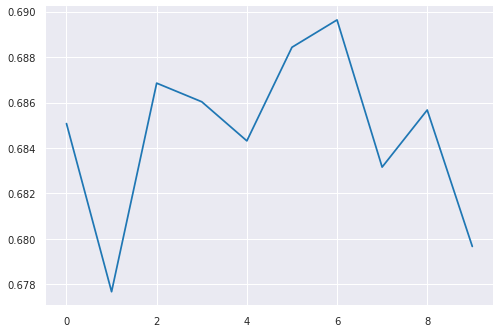

In [ ]:
from sklearn.model_selection import StratifiedKFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = RandomForestClassifier(n_estimators = 363, 
                                        max_depth = 11,
                                        max_features = 0.5534919739541848,
                                        class_weight ={0:1,1:2},
                                        criterion = "entropy",
                                        random_state = 42)    

        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds,average='weighted'))
        scores.append(f1_score(ytest,preds,average='weighted'))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

## Analyzing test data

In [123]:
test_new.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Not_Reco_Wt                float64
Reco_Wt                    float64
dtype: object

In [67]:
test_new.drop('ID',axis=1,inplace=True)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=42)

## RandomForestClassifier

In [ ]:
model  = RandomForestClassifier(n_estimators = 363, 
                                        max_depth = 11,
                                        max_features = 0.5534919739541848,
                                        class_weight ={0:1,1:2},
                                        criterion = "entropy",
                                        random_state = 42)    

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='entropy', max_depth=11,
                       max_features=0.5534919739541848, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=363, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

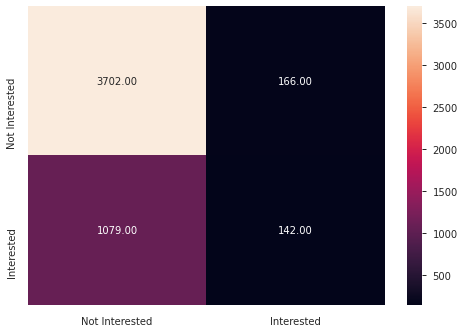

In [ ]:
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Not Interested','Interested'],yticklabels=['Not Interested','Interested'])

In [ ]:
f1_score(y_test,y_pred,average='weighted')

0.6952256433330196

In [ ]:
accuracy_score(y_test,y_pred)

0.7553546865788957

## Prediction on test data

In [ ]:
#y_pred = model.predict(test_new)
test_new = test_enc[X.columns]
y_pred = model.predict_proba(test_new)

In [ ]:
test['Response'] = y_pred[:,1]

In [ ]:
test[sub.columns].head()

ID  Response
0  50883  0.449542
1  50884  0.369238
2  50885  0.421183
3  50886  0.365148
4  50887  0.366500

In [ ]:
test[sub.columns].to_csv("randomforestclassifier_hyperopt.csv",index=False)

**Submission scores for RandomForestClassifier : 0.6530357183148948**

## CatboostClassifier

In [123]:
model  = model = CatBoostClassifier(max_depth=6,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=6000,verbose=0)
model.fit(X_train,y_train,cat_features = cat_cols)

## Validation Accuracy

In [124]:
y_pred = model.predict(X_test)

In [125]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

## Confusion Matrix

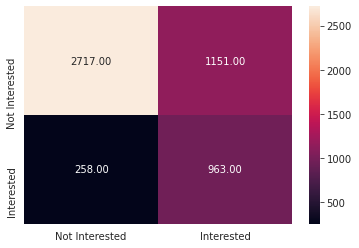

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Not Interested','Interested'],yticklabels=['Not Interested','Interested'])

## F1 Score

In [127]:
f1_score(y_test,y_pred,average='weighted')

0.7421310991024576

## Accuracy scores

In [128]:
accuracy_score(y_test,y_pred)

0.7231283159756338

## Prediction on Test Data

In [129]:
#y_pred = model.predict(test_new)
test_new = test_new[X.columns]
y_pred = model.predict_proba(test_new)

In [ ]:
sub.head()

ID  Response
0  50883         0
1  50884         0
2  50885         0
3  50886         0
4  50887         0

In [133]:
test.head()

ID City_Code  Region_Code  ... Reco_Policy_Premium Not_Reco_Wt   Reco_Wt
0  50883        C1          156  ...             11934.0    0.018462  0.023999
1  50884        C4            7  ...             32204.8    0.111913  0.100336
2  50885        C1          564  ...              9240.0    0.068135  0.091818
3  50886        C3         1177  ...              9086.0    0.111913  0.100336
4  50887        C1          951  ...             22534.0    0.018462  0.023999

[5 rows x 15 columns]

In [130]:
y_pred

array([[0.82168724, 0.17831276],
       [0.86484523, 0.13515477],
       [0.31580114, 0.68419886],
       ...,
       [0.97122787, 0.02877213],
       [0.22885503, 0.77114497],
       [0.85005031, 0.14994969]])

In [131]:
y_pred[:,1]

array([0.17831276, 0.13515477, 0.68419886, ..., 0.02877213, 0.77114497,
       0.14994969])

In [132]:
test['Response'] = y_pred[:,1]

In [121]:
test[sub.columns].head()

ID  Response
0  50883  0.219602
1  50884  0.182391
2  50885  0.690180
3  50886  0.202350
4  50887  0.130301

## Submitting prediction probabilities for Class 1

In [133]:
test[sub.columns].to_csv("catboost_hyperopt_RECO_wt_new_parameter_6000_max_depth_6.csv",index=False)

## Submission Results

* **Catboost hyperopt (catboost_hyperopt_id_4.csv)submission scores : 0.6679613421297262**


* **Catboost hyperopt (catboost_hyperopt_new_feature.csv)with new feature engineered the submission scores was reduced to  : 0.6297773760378171**


* **Scores improved without ne w feature being added 0.6654624625010256**

* **Scores improved with addition of Reco_wt features 0.6706098948029935. learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60**

* **Scores after tweaking evaluation metrics for CatBoost (max_depth=3,random_state=60 ,eval_metric='AUC',
                          auto_class_weights='Balanced',
                                   num_boost_round=1000,verbose=0)0.8049242214008948.**

* **Scores Your score for this submission is : 0.8057976648248104.(num_boost_round=2000)**

* **Your score for this submission is : 0.8054164810263842.(num_boost_round=5000)**

* **Your score for this submission is : 0.8049929273500971(num_boost_round=3000)**

* **Your score for this submission is : 0.8088649102465963.(max_depth=6,num_boost_round=6000)**

## Checking for Multicolinearity

In [ ]:
def check_mult_col(df,target,threshold =0.80):
  corr =  train.drop(target,axis=1).corr().abs()
  up_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
  #print(up_tri)
  #find all features having a correlation > threshold
  correlated_features = [col for col in up_tri.columns if any(up_tri[col] > threshold)]
  #print(f"The correlated features which can be dropped are :{correlated_features}")
  return correlated_features

In [ ]:
check_mult_col(train_new,'Response',0.75)

['Lower_Age', 'Reco_Policy_Premium']

## AutoFe _ automated Feature engineering

In [ ]:
!pip install autofeat

     |████████████████████████████████| 215kB 6.8MB/s 


In [ ]:
AutoFeatClassifier()

AutoFeatClassifier(always_return_numpy=False, apply_pi_theorem=True,
                   categorical_cols=None, feateng_cols=None, feateng_steps=2,
                   featsel_runs=5, max_gb=None, n_jobs=1,
                   transformations=('1/', 'exp', 'log', 'abs', 'sqrt', '^2',
                                    '^3'),
                   units=None, verbose=0)

In [ ]:
from autofeat import AutoFeatClassifier
model = AutoFeatClassifier(feateng_cols=['Reco_Policy_Cat'],
                           transformations=('1/', 'exp', 'log', 'abs', 'sqrt'),
                           verbose=2)
df = model.fit_transform(X,Y)

NameError: ignored

## AutoSklearn

In [ ]:
pip install scikit-learn==0.24.0

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.20.4
    Uninstalling scikit-learn-0.20.4:
      Successfully uninstalled scikit-learn-0.20.4


In [ ]:
!pip install auto-sklearn==0.10.0

In [ ]:
!sudo apt-get install build-essential swig 
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install 
!pip install auto-sklearn==0.10.0


Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   207  100   207    0     0   1224      0 --:--:-- --:--:-- --:--:--  1224
  Using cached https://files.pythonhosted.org/packages/f3/74/eb899f41d55f957e2591cde5528e75871f817d9fb46d4732423ecaca736d/scikit_learn-0.24.1-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: auto-sklearn 0.10.0 has requirement scikit-learn<0.23,>=0.22.0, but you'll have scikit-learn 0.24.1 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |███████████████████████

In [ ]:
from autosklearn.classification import AutoSklearnClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))



The scikit-learn version is 0.22.2.post1.


In [ ]:
X = train_enc.drop('Response',axis=1)
Y = train_enc['Response']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=42)

In [ ]:
autosk = AutoSklearnClassifier(time_left_for_this_task=60*2) 
autosk.fit(X_train, y_train)
print(autosk.sprint_statistics())

[WARNING] [2021-02-27 18:50:41,674:EnsembleBuilder(1):1a8c202a9b128d07a1aa07b20dc3192e] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-02-27 18:50:43,681:EnsembleBuilder(1):1a8c202a9b128d07a1aa07b20dc3192e] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-02-27 18:50:45,686:EnsembleBuilder(1):1a8c202a9b128d07a1aa07b20dc3192e] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-02-27 18:50:47,691:EnsembleBuilder(1):1a8c202a9b128d07a1aa07b20dc3192e] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-02-27 18:50:49,696:EnsembleBuilder(1):1a8c202a9b128d07a1aa07b20dc3192e] No models better than random - using Dummy Score!Number of model

In [ ]:
test_enc.dtypes

ID                           int64
City_Code                    int64
Region_Code                  int64
Accomodation_Type            int64
Reco_Insurance_Type          int64
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                    int64
Health Indicator             int64
Holding_Policy_Duration      int64
Holding_Policy_Type          int64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
dtype: object

In [ ]:
autosk.show_models()

'[(1.000000, MyDummyClassifier(configuration=1, init_params=None, random_state=None)),\n]'

In [ ]:
pred = autosk.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, pred))

Accuracy score 0.7600707408135193


In [ ]:
y_pred = autosk.predict_proba(test_enc)

In [ ]:
y_pred

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       ...,
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

autosklearn opted for a dummy model where the scores were not good

## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight={0:1,1:2})
lr

LogisticRegression(C=1.0, class_weight={0: 1, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 2}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)

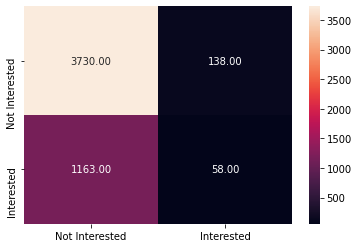

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Not Interested','Interested'],yticklabels=['Not Interested','Interested'])

In [ ]:
f1_score(y_test,y_pred,average='weighted')

0.6668423240174136

In [ ]:
accuracy_score(y_test,y_pred)

0.7443505600314404

In [ ]:
y_pred = lr.predict_proba(test_enc)

In [ ]:
y_pred

array([[0.69826037, 0.30173963],
       [0.64051147, 0.35948853],
       [0.6009911 , 0.3990089 ],
       ...,
       [0.77470918, 0.22529082],
       [0.56756718, 0.43243282],
       [0.79481272, 0.20518728]])

In [ ]:
test['Response'] = y_pred[:,1]

In [ ]:
test[sub.columns].head()

ID  Response
0  50883  0.301740
1  50884  0.359489
2  50885  0.399009
3  50886  0.420285
4  50887  0.226514

In [ ]:
test[sub.columns].to_csv("logistic_regression.csv",index=False)

**LR scores : 0.551788143065375**

In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

In [ ]:
print("Accuracy is {}%".format(tpot.score(X_test, y_test)*100))

**Due to genetic programming, the resulting model can be different every time you run the model**

In [ ]:
tpot.export('av_job_hack_pipeline.py')

In [ ]:
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')